# **Modelling and Evaluation**

## Objectives

* Answer Business Requirement 2:
    * The client is interested in a ML system capable of predicting whether a cherry leaf is healthy or contains powdery mildew.

## Inputs

* inputs/cherry_leaves/cherry-leaves/train
* inputs/cherry_leaves/cherry-leaves/validation
* inputs/cherry_leaves/cherry-leaves/test
* image shape embeddings 

## Outputs

* Image augmentation
* Class indices to change prediction inference in labels
* ML model creation and training
* Learning curve plot for model performance
* Model evaluation on pickle file
* Prediction on random image file

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/milestone-project-mildew-detection-in-cherry-leaves/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/milestone-project-mildew-detection-in-cherry-leaves'

# Set the Input and Output directories

https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/02%20-%20DataVisualization.ipynb

## Set the input directories

Create variables for the data directory path and its subfolders paths 

In [4]:
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/02%20-%20DataVisualization.ipynb

my_data_dir = '/workspace/milestone-project-mildew-detection-in-cherry-leaves/inputs/cherry_leaves/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set the output directories

Create folders and subfolders for storing the results of the research

In [5]:
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/02%20-%20DataVisualization.ipynb

version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


# Import the necessary libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

### Get the Labels in the training set

In [7]:
label_list = os.listdir(train_path)
print(f'Labels: {label_list}')

Labels: ['healthy', 'powdery_mildew']


### Get the image shape embeddings

In [8]:
# https://github.com/SamSswi/WalkthroughProject01DataAnalytics/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(100, 100, 3)

In [9]:
df_freq = joblib.load(filename=f"outputs/{version}/label_dist_freq_df.pkl")
df_freq

,Set,Label,Frequency
0,test,healthy,422
1,test,powdery_mildew,422
2,train,healthy,1472
3,train,powdery_mildew,1472
4,validation,healthy,210
5,validation,powdery_mildew,210


Section 1 content

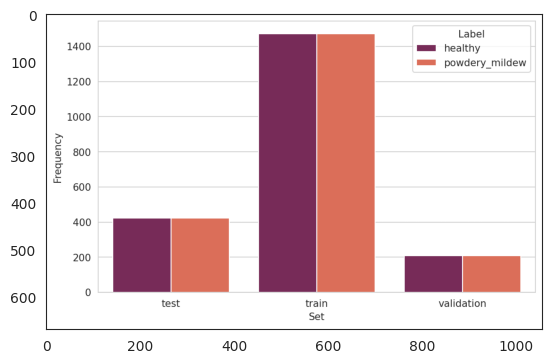

In [10]:
dist_plot = imread(f"outputs/{version}/labels_distribution_plot.png")
plt.imshow(dist_plot)
plt.show()

---

# Image Augmentation

* ### ImageDataGenerator

In [11]:
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-06-11 20:26:43.004295: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


* ### Initialize ImageDataGenerator

In [19]:

augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

* ### Augment the training set

In [20]:

batch_size = 28  # Set batch size, number of samples processed at each iteration
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='categorical',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* ### Augment the validation set images

In [21]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='categorical',
                                                                        shuffle=False)

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* ### Augment the test set images

In [22]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='categorical',
                                                                        shuffle=False)

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot augmented training image

(28, 100, 100, 3)


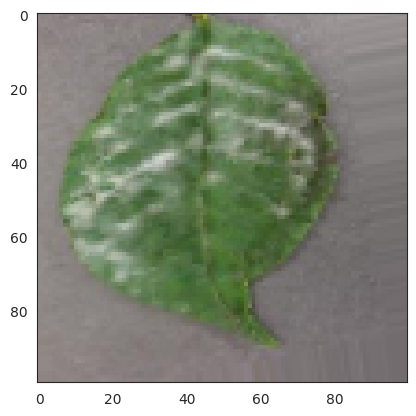

(28, 100, 100, 3)


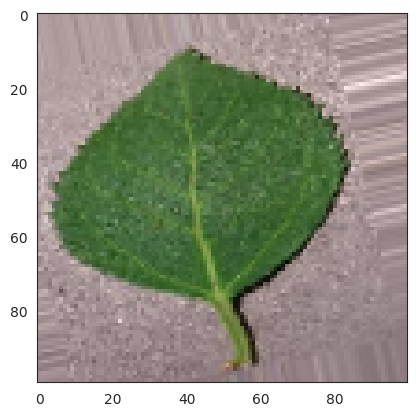

(28, 100, 100, 3)


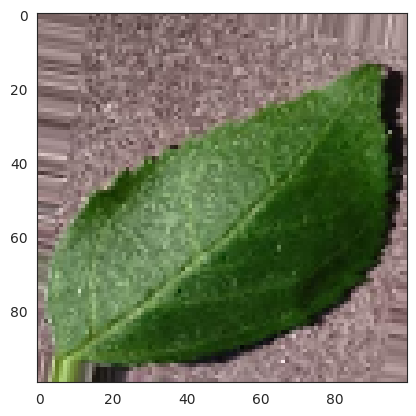

In [16]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Plot augmented validation image

(28, 100, 100, 3)


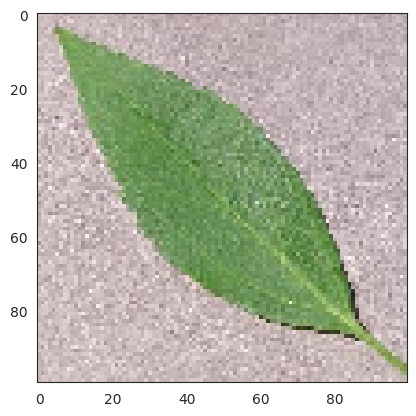

(28, 100, 100, 3)


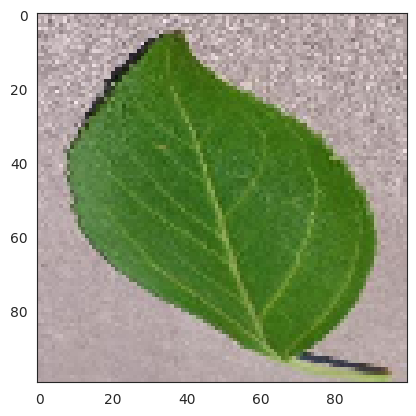

(28, 100, 100, 3)


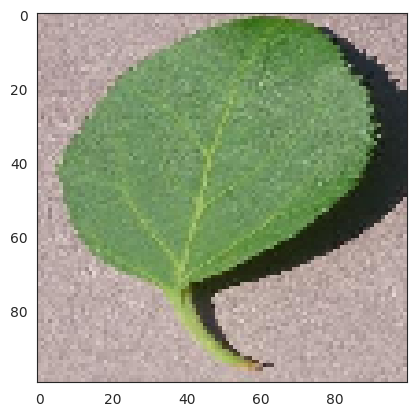

In [17]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Plot augmented test image

(28, 100, 100, 3)


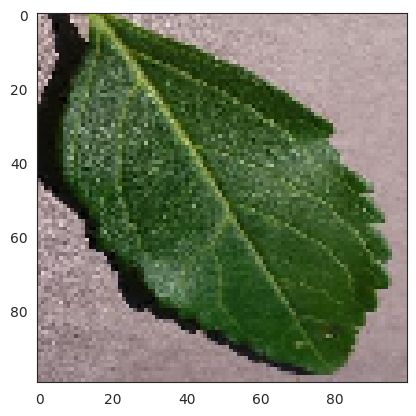

(28, 100, 100, 3)


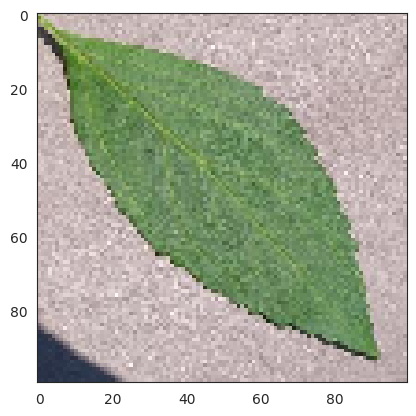

(28, 100, 100, 3)


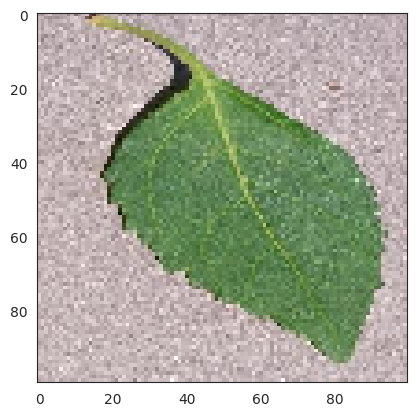

In [18]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

## Save class_indices

In [19]:
joblib.dump(value=train_set.class_indices, filename=f'{file_path}/class_indices.pkl')

['outputs/v1/class_indices.pkl']

## Model Creation


### Import Model Packages

In [12]:
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

### Model


* The idea to create a function - https://learn.codeinstitute.net/courses/course-v1:code_institute+CI_DA_ML+2021_Q4/courseware/1f851533cd6a4dcd8a280fd9f37ef4e2/81c19e89e4e94690bd58f738cb7eae91/?child=last

* model = Sequential() because it's a linear stack of layers and various types of layers can be added one after another - https://learn.codeinstitute.net/courses/course-v1:code_institute+CI_DA_ML+2021_Q4/courseware/1f851533cd6a4dcd8a280fd9f37ef4e2/81c19e89e4e94690bd58f738cb7eae91/?child=last

First Convolution Layer

* filters = 32 for the first convolution layer as recommended - https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

* kernel_size=(3,3) because the image size is lower than 128x128 as suggested here - https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

* relu activation because it doesn't activate all the neurons at the same time - https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/

Pooling layer 2x2 to avoid the loss of data - https://stackoverflow.com/questions/71255862/why-do-we-use-maxpooling-2x2-can-we-use-any-other-size-like-3x3-or-5x5-and-how#:~:text=Often%20times%2C%20applying%20a%20MaxPooling2D,a%20better%20option%20to%20choose.

Second Convolution Layer 
because when using only one layer, the results weren't consistent during test runs I decided to use a second layer with 64 filters. The increment was suggested here - https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

Flatten Layer - The Flatten layer is used to flatten the matrix into a vector, which means a single list of all values. Then that is fed into a dense layer. - https://learn.codeinstitute.net/courses/course-v1:code_institute+CI_DA_ML+2021_Q4/courseware/1f851533cd6a4dcd8a280fd9f37ef4e2/81c19e89e4e94690bd58f738cb7eae91/

Dense Layer

* 128 neurons - in the Image Classification Unit, it was suggested 128 is a good starting point. The model learned well with 128 neurons - https://learn.codeinstitute.net/courses/course-v1:code_institute+CI_DA_ML+2021_Q4/courseware/1f851533cd6a4dcd8a280fd9f37ef4e2/81c19e89e4e94690bd58f738cb7eae91/

* relu activation because it doesn't activate all the neurons at the same time - https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/

Output Layer
* number of layers is equal to the number of categories in the datasets - https://learn.codeinstitute.net/courses/course-v1:code_institute+CI_DA_ML+2021_Q4/courseware/1f851533cd6a4dcd8a280fd9f37ef4e2/81c19e89e4e94690bd58f738cb7eae91/

* softmax activation because the probabilities sum will be always 1. This is good for increasing the likelihood of one class. - https://medium.com/arteos-ai/the-differences-between-sigmoid-and-softmax-activation-function-12adee8cf322#:~:text=Softmax%20is%20used%20for%20multi,in%20the%20Logistic%20Regression%20model.

* to compile the model I used categorical_crossentropy for the loss function, arranged to monitor the metric accuracy and set the optimizer to rmsprop as recommended in the Model Training video of the Malaria detection walkthrough project - https://learn.codeinstitute.net/courses/course-v1:code_institute+CI_DA_ML+2021_Q4/courseware/07a3964f7a72407ea3e073542a2955bd/29ae4b4c67ed45a8a97bb9f4dcfa714b/



In [21]:
# https://learn.codeinstitute.net/courses/course-v1:code_institute+CI_DA_ML+2021_Q4/courseware/1f851533cd6a4dcd8a280fd9f37ef4e2/81c19e89e4e94690bd58f738cb7eae91/?child=last
def create_tf_model(input_shape, n_labels):
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu',))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))

    model.add(Dense(n_labels, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

    return model



Visualizing network structure

In [22]:
# https://learn.codeinstitute.net/courses/course-v1:code_institute+CI_DA_ML+2021_Q4/courseware/1f851533cd6a4dcd8a280fd9f37ef4e2/81c19e89e4e94690bd58f738cb7eae91/?child=last
n_labels = len(label_list)
model = create_tf_model(input_shape=image_shape, n_labels=n_labels)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 128)               4

### Early Stopping

In [23]:
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=7)

In [24]:
model.fit(train_set,
          epochs=30,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

Epoch 1/30


2023-06-11 16:05:17.023820: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


105/105 [==============================] - ETA: 0s - loss: 0.5293 - accuracy: 0.7816

2023-06-11 16:05:29.613649: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


105/105 [==============================] - 13s 119ms/step - loss: 0.5293 - accuracy: 0.7816 - val_loss: 0.2304 - val_accuracy: 0.9095
Epoch 2/30
105/105 [==============================] - 9s 88ms/step - loss: 0.1911 - accuracy: 0.9184 - val_loss: 0.1059 - val_accuracy: 0.9738
Epoch 3/30
105/105 [==============================] - 9s 89ms/step - loss: 0.1104 - accuracy: 0.9657 - val_loss: 0.0628 - val_accuracy: 0.9929
Epoch 4/30
105/105 [==============================] - 9s 89ms/step - loss: 0.0813 - accuracy: 0.9695 - val_loss: 0.0538 - val_accuracy: 0.9905
Epoch 5/30
105/105 [==============================] - 9s 89ms/step - loss: 0.0494 - accuracy: 0.9832 - val_loss: 0.1368 - val_accuracy: 0.9429
Epoch 6/30
105/105 [==============================] - 9s 87ms/step - loss: 0.0305 - accuracy: 0.9897 - val_loss: 0.0508 - val_accuracy: 0.9929
Epoch 7/30
105/105 [==============================] - 9s 86ms/step - loss: 0.0492 - accuracy: 0.9842 - val_loss: 0.0467 - val_accuracy: 0.9952
Epoch 8/

### Save Model

In [25]:

model.save(f'{file_path}/cherry_mildew_detector_model.h5')

## Model perfromance

### Model Learning Curve

In [13]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)
plt.show()

NameError: name 'model' is not defined

---

## Model Evaluation

Load saved model

In [16]:
from keras.models import load_model
model = load_model(f'{file_path}/cherry_mildew_detector_model.h5')

Evaluate the Model on the test set

In [23]:
evaluation = model.evaluate(test_set)

 1/31 [..............................] - ETA: 5s - loss: 1.4816e-06 - accuracy: 1.0000

2023-06-11 20:29:54.549512: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


31/31 [==============================] - 2s 55ms/step - loss: 0.0055 - accuracy: 0.9988


### Save evaluation as a pkl file

In [30]:
joblib.dump(value=evaluation, filename=f'{file_path}/model_evaluation.pkl')

['outputs/v1/model_evaluation.pkl']

## Prediction

Predict on one sample image from the test set. (Unknown data)

['healthy', 'powdery_mildew']
313
healthy
Image shape: (100, 100), Image mode: RGB


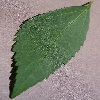

In [402]:
# https://github.com/Code-Institute-Solutions/WalkthroughProject01/blob/main/jupyter_notebooks/03%20-%20Modelling%20and%20Evaluating.ipynb
from tensorflow.keras.preprocessing import image
import random
print(label_list)
index = random.randint(1, 422)
print(index)
p_label = label_list[0]
print(p_label)
p_image = image.load_img(f"{test_path}/{p_label}/{os.listdir(test_path+'/'+p_label)[index]}", target_size=image_shape, color_mode='rgb')
print(f'Image shape: {p_image.size}, Image mode: {p_image.mode}')
p_image

Convert image to array

In [403]:
arr_image = image.img_to_array(p_image)
arr_image = np.expand_dims(arr_image, axis=0)/255
print(arr_image.shape)

(1, 100, 100, 3)


Predict label probabilities

In [404]:
# pred_proba = model.predict(arr_image)[0, 0]

# target_map = {v: k for k, v in train_set.class_indices.items()}
# pred_class = target_map[pred_proba > 0.5]

# if pred_class == target_map[0]:
#     pred_proba = 1 - pred_proba

# print(pred_proba)
# print(pred_class)
pred_probs = model.predict(arr_image)[0]
pred_class_index = np.argmax(pred_probs)
pred_proba = pred_probs[pred_class_index]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_class_index]

print(pred_proba)
print(pred_class)

1/1 [==============================] - 0s 16ms/step
0.9999999
healthy


NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* If you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [164]:
import os
try:
    # create here your folder
    # os.makedirs(name='')
except Exception as e:
    print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (1114530593.py, line 5)